In [6]:
from IPython.display import Image

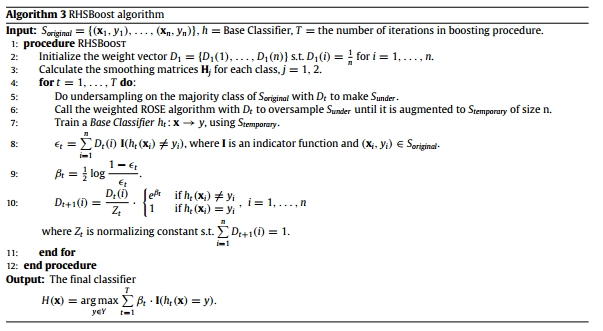

In [7]:
Image(r"C:\Users\user\Desktop\사진\RHSBoost.PNG")

# library

In [1]:
from tqdm import tqdm
import time
import pandas as pd
import numpy as np
import random
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Example 1

In [2]:
data=pd.read_csv(r"C:\Users\user\Desktop\train.csv")
data=data.drop(['ID'],axis=1)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,103,60,33,192,24.0,0.966,33,0
1,10,133,68,0,0,27.0,0.245,36,0
2,4,112,78,40,0,39.4,0.236,38,0
3,1,119,88,41,170,45.3,0.507,26,0
4,1,114,66,36,200,38.1,0.289,21,0
...,...,...,...,...,...,...,...,...,...
647,1,91,64,24,0,29.2,0.192,21,0
648,10,122,68,0,0,31.2,0.258,41,0
649,8,84,74,31,0,38.3,0.457,39,0
650,2,81,72,15,76,30.1,0.547,25,0


# Example 2

In [2]:
data=pd.read_csv(r"C:\Users\user\Graduate\Workshop\2023_2\Practice\creditcard.csv")
data=data.drop(['Time','Amount'],axis=1)
data=data.iloc[12000:15000]
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
12000,1.242150,0.623983,0.251006,1.436726,-0.153600,-1.452853,0.467396,-0.467370,0.977706,-0.324385,...,-0.218707,-0.113056,-0.026066,-0.067244,0.876411,0.756664,-0.367866,-0.034349,0.009861,0
12001,-0.855730,0.144212,2.170959,-1.786724,-0.045871,-0.436866,-0.109179,0.150945,2.764718,-2.170650,...,-0.174900,-0.165524,-0.244690,-0.383586,-0.564177,0.550351,-0.755000,0.061131,0.062986,0
12002,-0.212004,0.753535,1.223040,0.181289,0.651291,0.381930,0.469577,-0.073186,1.278322,-1.050039,...,0.042504,-0.235028,-0.199665,-0.361020,-0.983794,0.357379,0.442050,-0.018542,-0.000100,0
12003,1.185680,-0.329083,1.009692,-0.561179,-0.971965,-0.307358,-0.738162,0.029889,3.122389,-1.495503,...,-0.187587,-0.130234,0.125373,-0.002259,0.033799,0.395541,-0.696177,0.080440,0.027063,0
12004,-0.333837,1.250884,1.437889,0.263291,0.111567,-0.937753,0.611525,-0.152919,0.890815,-0.880124,...,0.065634,-0.415962,-0.876026,-0.009245,0.268013,-0.183962,0.033665,0.219739,0.091659,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.139049,0.078237,0.480345,0.471539,-0.271098,-0.195209,-0.108635,0.087148,-0.189344,0.056574,...,-0.089957,-0.169569,-0.544291,0.139743,0.007989,0.101150,0.105698,-0.021173,0.008139,0
14996,1.297527,0.290501,-0.157129,0.300362,0.275047,-0.075184,-0.028201,0.006493,-0.178580,-0.117804,...,-0.020299,-0.310852,-0.915030,-0.029196,-0.872330,0.349254,0.148786,-0.026891,0.009091,0
14997,1.245674,0.166975,0.488306,0.635322,-0.562777,-1.011073,0.014953,-0.160211,0.170362,-0.044575,...,-0.132080,-0.262581,-0.816264,0.140304,0.357827,0.186423,0.096544,-0.035866,0.018495,0
14998,1.297276,-0.694728,0.965737,-0.673381,-1.258920,-0.230760,-1.015842,0.016820,-0.544937,0.528368,...,0.155417,0.430698,1.238301,-0.099574,0.156464,0.379390,-0.025062,0.056696,0.027675,0


# RHSBoost

In [3]:
#종속변수는 맨 마지막 열에와야함
# data : data
# Class : 종속변수 Name
# N : the number of original data 
# T : the number of iteration

def RHSBoost(data,Class,N,T):
    n=data.shape[0]
    beta=[]
    X_original=data.iloc[:,:-1]
    y_original=data.iloc[:,-1]
    D=np.ones(X_original.shape[0])/X_original.shape[0]
    epsilon=0.0001
    f1=[]
    dic={}
    for t in tqdm(range(T)):
    
        # random under sampling
        X_train=data.iloc[:,:-1]
        y_train=data.iloc[:,-1]

        X_train, y_train = RandomUnderSampler().fit_resample(X_train, y_train)

        X_train[Class]=y_train
        data_new=X_train

        # ROSE sampling
        dataframe_class=pd.DataFrame()
        d=len(data_new.columns)-1
        for i in range(N):
            num=random.randrange(0,2)
            class1=data_new[data_new[Class]==0]
            class1=class1.drop([Class],axis=1)
            class2=data_new[data_new[Class]==1]
            class2=class2.drop([Class],axis=1)
            if num==0:
                num1=random.sample(range(class1.shape[0]),1)
                class1_1=pd.DataFrame()
                for j in class1.iloc[num1].columns:
                    x=np.random.normal(loc=class1.iloc[num1][j].values[0],scale=(4/(d+2)*n)**(1/(d+4))*np.std(class1[j]),size=(1000))
                    class1_1[j]=random.choices(x)
                class1_1[Class]=0
                dataframe_class=pd.concat([dataframe_class,class1_1])
            else:
                num2=random.sample(range(class2.shape[0]),1)
                class2_1=pd.DataFrame()
                for j in class2.iloc[num2].columns:
                    x=np.random.normal(loc=class2.iloc[num2][j].values[0],scale=(4/(d+2)*n)**(1/(d+4))*np.std(class2[j]),size=(1000))
                    class2_1[j]=random.choices(x)
                class2_1[Class]=1
                dataframe_class=pd.concat([dataframe_class,class2_1])
        
        #AdaBoost
        X_temporary=dataframe_class.iloc[:,:-1]
        y_temporary=dataframe_class.iloc[:,-1]
        model=DecisionTreeClassifier()
        model.fit(X_temporary,y_temporary,sample_weight = D)
        y_test=model.predict(X_original)
        
        for q in range(X_original.shape[0]):
            if y_test[q]==y_original.iloc[q]:
                num1=0
            else:
                num1=1
            ep=D[q]*num1
            epsilon+=ep
        beta.append((1/2)*np.log1p((1-epsilon)/epsilon))
        for e in range(X_original.shape[0]):
            if y_test[e]==y_original.iloc[e]:
                num2=1
            else:
                num2=np.exp(beta[t])
            D[e]=D[e]*num2     
                
    confusion=confusion_matrix(y_original,y_test)
#     f1=f1_score(y_original, y_test)
#     dic[t]=f1
#     return max(dic),dic[max(dic)]
    return beta,confusion

# Result

In [80]:
RHSBoost(data,'Outcome',652,5)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.87s/it]


(0, 0.5482456140350878)

In [5]:
RHSBoost(data,'Class',3000,5)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:50<00:00, 34.02s/it]


([1.4031072249447216,
  0.48724637573732743,
  0.05296521468447094,
  -0.10861690963599643,
  -0.19614124617814416],
 array([[2656,  335],
        [   2,    7]], dtype=int64))